# Import all Libraries

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation 

# Import the Dataset

In [2]:
DIRECTORIES = r'data1'
FEACHERS = ['female','male']

In [3]:
data = []

for feachers in FEACHERS:
    folder = os.path.join(DIRECTORIES,feachers)
    lebel = FEACHERS.index(feachers)
    
    for img in os.listdir(folder):
        img_arr = os.path.join(folder,img)
        img_arr = cv2.imread(img_arr)
        img_arr = cv2.resize(img_arr,(256,256))
        data.append([img_arr,lebel])
        

# Showing through the data

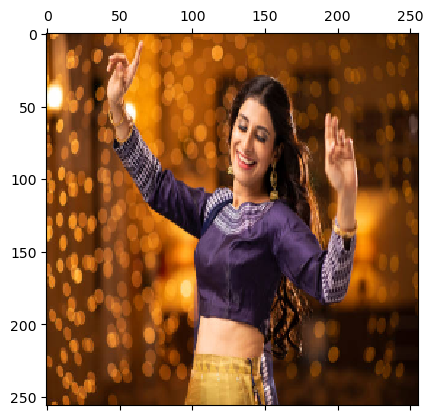

In [4]:
plt.matshow(cv2.cvtColor(data[22][0], cv2.COLOR_BGR2RGB))

# Shuffle the Data

In [5]:
np.random.shuffle(data)

# Coverting data into lists

In [6]:
x = []
y = []

for feachers,lebel in data:
    x.append(feachers)
    y.append(lebel)

# Converting lists into numpy array

In [7]:
x = np.array(x)
y = np.array(y)

# Before Scaling the data

In [8]:
x

array([[[[243, 238, 235],
         [243, 238, 235],
         [243, 238, 235],
         ...,
         [166, 181, 200],
         [139, 157, 169],
         [159, 178, 192]],

        [[243, 238, 235],
         [243, 238, 235],
         [243, 238, 235],
         ...,
         [180, 200, 217],
         [148, 164, 177],
         [173, 190, 204]],

        [[243, 238, 235],
         [243, 238, 235],
         [243, 238, 235],
         ...,
         [186, 209, 220],
         [145, 162, 171],
         [172, 189, 200]],

        ...,

        [[199, 205, 210],
         [207, 212, 217],
         [207, 213, 218],
         ...,
         [111, 143, 173],
         [117, 140, 172],
         [116, 139, 171]],

        [[200, 206, 211],
         [209, 215, 220],
         [211, 217, 222],
         ...,
         [116, 146, 176],
         [119, 142, 174],
         [118, 141, 173]],

        [[189, 195, 200],
         [200, 206, 211],
         [205, 211, 216],
         ...,
         [119, 147, 178],
        

# Scaling the data

In [9]:
x = x/255

# After Scaling the data

In [10]:
x

array([[[[0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         ...,
         [0.65098039, 0.70980392, 0.78431373],
         [0.54509804, 0.61568627, 0.6627451 ],
         [0.62352941, 0.69803922, 0.75294118]],

        [[0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         ...,
         [0.70588235, 0.78431373, 0.85098039],
         [0.58039216, 0.64313725, 0.69411765],
         [0.67843137, 0.74509804, 0.8       ]],

        [[0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         [0.95294118, 0.93333333, 0.92156863],
         ...,
         [0.72941176, 0.81960784, 0.8627451 ],
         [0.56862745, 0.63529412, 0.67058824],
         [0.6745098 , 0.74117647, 0.78431373]],

        ...,

        [[0.78039216, 0.80392157, 0.82352941],
         [0.81176471, 0.83137255, 0.85098039]

# Build the model

In [11]:
model = Sequential()
model.add(Conv2D(32,kernel_size =(3,3),input_shape=x[0].shape, activation = 'sigmoid'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Compile the model

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Train the model

In [20]:
model.fit(x,y, epochs=10, batch_size=1)

Epoch 1/10
79/79 [==============================] - 4s 48ms/step - loss: 13.1568 - accuracy: 0.7089
Epoch 2/10
79/79 [==============================] - 4s 53ms/step - loss: 6.0877 - accuracy: 0.7975
Epoch 3/10
79/79 [==============================] - 4s 49ms/step - loss: 14.3548 - accuracy: 0.6962
Epoch 4/10
79/79 [==============================] - 4s 46ms/step - loss: 5.3411 - accuracy: 0.8987
Epoch 5/10
79/79 [==============================] - 4s 55ms/step - loss: 7.7106 - accuracy: 0.7975
Epoch 6/10
79/79 [==============================] - 4s 54ms/step - loss: 1.0203 - accuracy: 0.9367
Epoch 7/10
79/79 [==============================] - 4s 52ms/step - loss: 5.3761 - accuracy: 0.8481
Epoch 8/10
79/79 [==============================] - 4s 55ms/step - loss: 4.7098 - accuracy: 0.8861
Epoch 9/10
79/79 [==============================] - 4s 51ms/step - loss: 14.4107 - accuracy: 0.7342
Epoch 10/10
79/79 [==============================] - 5s 65ms/step - loss: 0.5994 - accuracy: 0.9747


# Prediction with custom images

Insert the image and Scaling 

AxesImage(80,52.8;496x369.6)


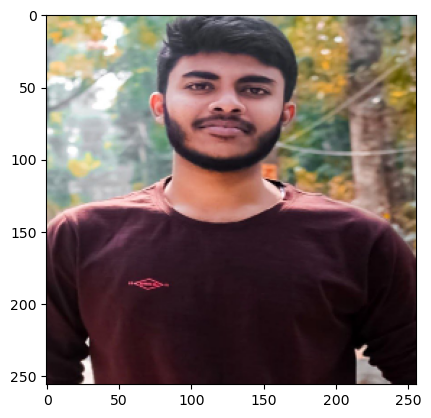

In [21]:
img_pred = cv2.imread('piyansu.jpg')
img_pred = cv2.resize(img_pred,(256,256))
print(plt.imshow(cv2.cvtColor(img_pred , cv2.COLOR_BGR2RGB)))
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred/255

Prediction

In [23]:
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]>rslt[0][1]:
    print("this image is for female")
else:
    print("this is for male")

1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
this is for male


# Other Predictions

AxesImage(80,52.8;496x369.6)
1/1 [==============================] - 0s 27ms/step
[[1.0000000e+00 3.3231133e-13]]
this image is for female


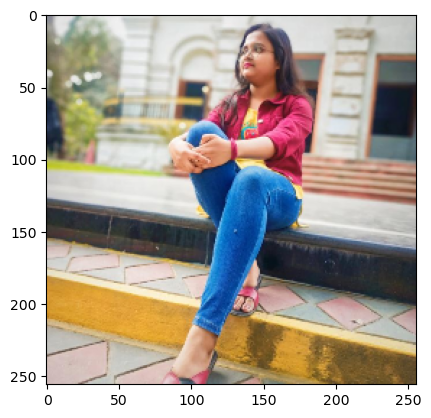

In [27]:
img_pred = cv2.imread("C:/Users/PIYANSU/Desktop/Image Classification/Male_vs_Female Classification/data1/female/323855796_1634687010329716_4883948862356860312_n.jpg")
img_pred = cv2.resize(img_pred,(256,256))
print(plt.imshow(cv2.cvtColor(img_pred , cv2.COLOR_BGR2RGB)))
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred/255

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]>rslt[0][1]:
    print("this image is for female")
else:
    print("this is for male")

AxesImage(80,52.8;496x369.6)
1/1 [==============================] - 0s 30ms/step
[[3.4082833e-13 1.0000000e+00]]
this is for male


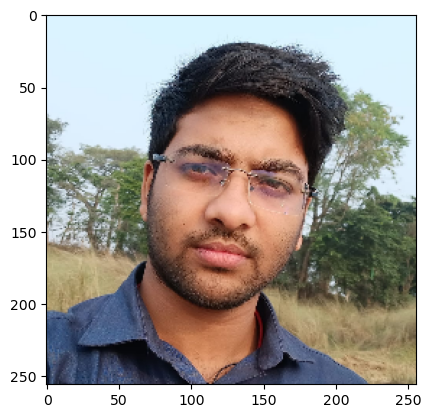

In [25]:
img_pred = cv2.imread('joy.jpg')
img_pred = cv2.resize(img_pred,(256,256))
print(plt.imshow(cv2.cvtColor(img_pred , cv2.COLOR_BGR2RGB)))
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred/255

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]>rslt[0][1]:
    print("this image is for female")
else:
    print("this is for male")

AxesImage(80,52.8;496x369.6)
1/1 [==============================] - 0s 28ms/step
[[3.2832718e-04 9.9967170e-01]]
this is for male


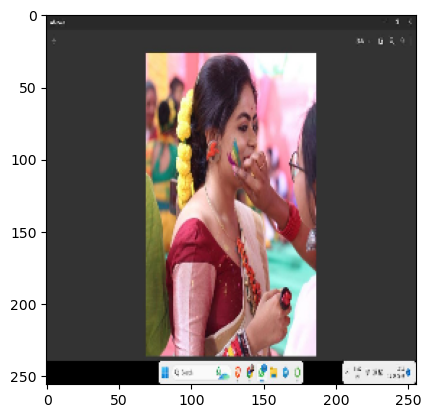

In [28]:
img_pred = cv2.imread("mouli.jpg")
img_pred = cv2.resize(img_pred,(256,256))
print(plt.imshow(cv2.cvtColor(img_pred , cv2.COLOR_BGR2RGB)))
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred/255

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]>rslt[0][1]:
    print("this image is for female")
else:
    print("this is for male")